# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
print(heroes_df.head())

print(powers_df.head())
    

   Unnamed: 0         name Gender Eye color               Race Hair color  \
0           0       A-Bomb   Male    yellow              Human    No Hair   
1           1   Abe Sapien   Male      blue      Icthyo Sapien    No Hair   
2           2     Abin Sur   Male      blue            Ungaran    No Hair   
3           3  Abomination   Male     green  Human / Radiation    No Hair   
4           4      Abraxas   Male      blue      Cosmic Entity      Black   

   Height          Publisher Skin color Alignment  Weight  
0   203.0      Marvel Comics          -      good   441.0  
1   191.0  Dark Horse Comics       blue      good    65.0  
2   185.0          DC Comics        red      good    90.0  
3   203.0      Marvel Comics          -       bad   441.0  
4   -99.0      Marvel Comics          -       bad   -99.0  
    hero_names  Agility  Accelerated Healing  Lantern Power Ring  \
0      3-D Man     True                False               False   
1       A-Bomb    False                 T

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df= heroes_df.drop('Unnamed: 0', axis = 1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
# heroes_df.info()
# heroes_df.isna().sum()
# heroes_df.isna()
# heroes_df['Publisher'].value_counts(normalize=True)
# heroes_df['Publisher'].unique()
# heroes_df['Publisher'].isnull()



#lengths of using isnull vs isna is the same

# print(heroes_row_has_NaN)

In [5]:
powers_df.info(verbose=True, null_counts=True)
# powers_df.isna()
powers_df.columns.value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 168 columns):
hero_names                      667 non-null object
Agility                         667 non-null bool
Accelerated Healing             667 non-null bool
Lantern Power Ring              667 non-null bool
Dimensional Awareness           667 non-null bool
Cold Resistance                 667 non-null bool
Durability                      667 non-null bool
Stealth                         667 non-null bool
Energy Absorption               667 non-null bool
Flight                          667 non-null bool
Danger Sense                    667 non-null bool
Underwater breathing            667 non-null bool
Marksmanship                    667 non-null bool
Weapons Master                  667 non-null bool
Power Augmentation              667 non-null bool
Animal Attributes               667 non-null bool
Longevity                       667 non-null bool
Intelligence                    667 non-nu

Mind Blast                      0.005952
Power Augmentation              0.005952
Weather Control                 0.005952
Intelligence                    0.005952
Hyperkinesis                    0.005952
                                  ...   
Omnilingualism                  0.005952
Toxin and Disease Resistance    0.005952
Anti-Gravity                    0.005952
Plant Control                   0.005952
Time Travel                     0.005952
Length: 168, dtype: float64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [6]:
#For array input, returns an array of boolean indicating whether each corresponding element is missing.
heroes_isNaN = heroes_df.isnull()

#Return whether any element is True over requested axis
heroes_row_has_NaN = heroes_isNaN.any(axis=1)

# type(heroes_row_has_NaN)
heroes_rows_with_NaN = heroes_df[heroes_row_has_NaN]
print(heroes_rows_with_NaN)

                 name  Gender Eye color    Race Hair color  Height Publisher  \
46          Astro Boy    Male     brown       -      Black   -99.0       NaN   
86       Bionic Woman  Female      blue  Cyborg      Black   -99.0       NaN   
138        Brundlefly    Male         -  Mutant          -   193.0       NaN   
175      Chuck Norris    Male         -       -          -   178.0       NaN   
204          Darkside       -         -       -          -   -99.0       NaN   
244        Ethan Hunt    Male     brown   Human      Brown   168.0       NaN   
263      Flash Gordon    Male         -       -          -   -99.0       NaN   
286          Godzilla       -         -   Kaiju          -   108.0       NaN   
348        Jack Bauer    Male         -       -          -   -99.0       NaN   
354      Jason Bourne    Male         -   Human          -   -99.0       NaN   
381  Katniss Everdeen  Female         -   Human          -   -99.0       NaN   
389         King Kong    Male    yellow 

In [7]:
#Find all -99 values for the columns height and weight

print(len(heroes_df[heroes_df['Height'].values == -99]))
print((len(heroes_df[heroes_df['Height'].values == -99]))/(len(heroes_df['Height'])))

print(len(heroes_df[heroes_df['Weight'].values == -99]))
print((len(heroes_df[heroes_df['Weight'].values == -99]))/(len(heroes_df['Weight'])))

217
0.2956403269754768
237
0.3228882833787466


In [8]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [9]:
#For array input, returns an array of boolean indicating whether each corresponding element is missing.
powers_isNaN = powers_df.isnull()
# print(powers_isNaN)
#Return whether any element is True over requested axis
powers_row_has_NaN = powers_isNaN.any(axis=1)
print(powers_row_has_NaN)
# type(heroes_row_has_NaN)
# powers_rows_with_NaN = powers_df[powers_row_has_NaN]
print(powers_df[powers_row_has_NaN])



### EMPTY DATA FRAME POWERS DF IS GOOD TO GO ###

0      False
1      False
2      False
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Length: 667, dtype: bool
Empty DataFrame
Columns: [hero_names, Agility, Accelerated Healing, Lantern Power Ring, Dimensional Awareness, Cold Resistance, Durability, Stealth, Energy Absorption, Flight, Danger Sense, Underwater breathing, Marksmanship, Weapons Master, Power Augmentation, Animal Attributes, Longevity, Intelligence, Super Strength, Cryokinesis, Telepathy, Energy Armor, Energy Blasts, Duplication, Size Changing, Density Control, Stamina, Astral Travel, Audio Control, Dexterity, Omnitrix, Super Speed, Possession, Animal Oriented Powers, Weapon-based Powers, Electrokinesis, Darkforce Manipulation, Death Touch, Teleportation, Enhanced Senses, Telekinesis, Energy Beams, Magic, Hyperkinesis, Jump, Clairvoyance, Dimensional Travel, Power Sense, Shapeshifting, Peak Human Condition, Immortality, Camouflage, Element Control, Phasing, Astral P

In [10]:
heroes_df_NaN_removed = pd.DataFrame(heroes_df.dropna())
heroes_df_NaN_removed.head()
len(heroes_df_NaN_removed)
heroes_df_NaN_removed.isna().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [11]:
#I'm going to drop the two columns "Height" and "Weight" because very high percentage is -99
# I can probably remove and create a new df with the new values but will it be statistically significant?
# What trends am I actually wanting to get out of this?

#Since it is only 15 values, im going to create new df where i put the median weight...but some superheros are different no?
#Ill use median and see what happens, it is only a few hundred........i dont think thats a good idea for a histogram

####DECISION - I'm going to go ahead and remove the data all rows with -99 ####

heroes_df_NaN_removed_no_neg99 = heroes_df_NaN_removed[(heroes_df_NaN_removed['Height'] != -99) & (heroes_df_NaN_removed['Weight'] != -99)]


In [12]:
#Now to check the new df for any -99
#I GET ZERO FUCKING PERFECT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

print(len(heroes_df_NaN_removed_no_neg99[heroes_df_NaN_removed_no_neg99['Height'].values == -99]))
print((len(heroes_df_NaN_removed_no_neg99[heroes_df_NaN_removed_no_neg99['Height'].values == -99]))/(len(heroes_df_NaN_removed_no_neg99['Height'])))

print(len(heroes_df_NaN_removed_no_neg99[heroes_df_NaN_removed_no_neg99['Weight'].values == -99]))
print((len(heroes_df_NaN_removed_no_neg99[heroes_df_NaN_removed_no_neg99['Weight'].values == -99]))/(len(heroes_df_NaN_removed_no_neg99['Weight'])))

0
0.0
0
0.0


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [25]:
#What are the two dataframes I am joining?
# I am joining : heroes_df_NaN_removed_no_neg99 and powers_df
# My main concern is will it line up with the heros?
#### ILL HAVE TO USE INNER JOIN TO BASED ON HERO NAMES THAT I CLEANED####

heroes_and_powers = pd.merge(left=heroes_df_NaN_removed_no_neg99, right=powers_df, left_on='name', right_on='hero_names')
# heroes_and_powers.head()
heroes_and_powers.info()

heroes_and_powers['hero_names']



<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Columns: 178 entries, name to Omniscient
dtypes: bool(167), float64(2), object(9)
memory usage: 118.7+ KB


0               A-Bomb
1           Abe Sapien
2             Abin Sur
3          Abomination
4        Absorbing Man
            ...       
457       Yellowjacket
458    Yellowjacket II
459               Yoda
460            Zatanna
461               Zoom
Name: hero_names, Length: 462, dtype: object

In [40]:
#find duplicates 
##THERE ARE NO DUPLICATES

#447 != BECAUSE THESE ARE ALL UNIQUES!

#447 + 7 duplicated uniqes = 454

#447 + 15 = ? 462!!!!!!!!!!!!!!!!!!!!!! YES I GOT THE DUPLICATES!
# len(heroes_and_powers['name'].unique())

heroes_and_powers1 = heroes_and_powers.duplicated(subset=['name'], keep=False)
# heroes_and_powers = heroes_and_powers[~heroes_and_powers1]
heroes_and_powers1
heroes_and_powers[heroes_and_powers1]


# x = heroes_and_powers[heroes_and_powers['name'] == 'Batman']
# print(x)



# heroes_and_powers.info()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
32,Atlas,Male,brown,Mutant,Red,183.0,Marvel Comics,-,good,101.0,...,False,False,False,False,False,False,False,False,False,False
33,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0,...,False,False,False,False,False,False,False,False,False,False
45,Batman,Male,blue,Human,black,188.0,DC Comics,-,good,95.0,...,False,False,False,False,False,False,False,False,False,False
46,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0,...,False,False,False,False,False,False,False,False,False,False
60,Black Canary,Female,blue,Human,Blond,165.0,DC Comics,-,good,58.0,...,False,False,False,False,False,False,False,False,False,False
61,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0,...,False,False,False,False,False,False,False,False,False,False
93,Captain Marvel,Female,blue,Human-Kree,Blond,180.0,Marvel Comics,-,good,74.0,...,False,False,False,False,False,False,False,False,False,False
94,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0,...,False,False,False,False,False,False,False,False,False,False
303,Nova,Male,brown,Human,Brown,185.0,Marvel Comics,-,good,86.0,...,False,False,False,False,False,False,False,False,False,False
304,Nova,Female,white,Human / Cosmic,Red,163.0,Marvel Comics,gold,good,59.0,...,False,False,False,False,False,False,False,False,False,False


In [57]:
#DECISION FOR DUPLICATES = KEEP FIRST, REMOVE REST! 
#I wanted to average the weight and heights but there are also other columns which have also special entries as well
# I Can also treat each one separately and keeo the duplicates bt how will that affect my data?


heroes_and_powers = heroes_and_powers.drop_duplicates(subset=['name'], keep='first')
# len(heroes_and_powers['name'])
print(heroes_and_powers[heroes_and_powers['name'] == 'Batman'])
print(len(heroes_and_powers['name']))
print(len(heroes_and_powers['name'].unique()))
#test len of both len of names nad uniques. ALL UPLICATES REMOVED!
print((len(heroes_and_powers['name'])) == (len(heroes_and_powers['name'].unique()) ))

      name Gender Eye color   Race Hair color  Height  Publisher Skin color  \
45  Batman   Male      blue  Human      black   188.0  DC Comics          -   

   Alignment  Weight  ... Web Creation  Reality Warping  Odin Force  \
45      good    95.0  ...        False            False       False   

    Symbiote Costume  Speed Force  Phoenix Force  Molecular Dissipation  \
45             False        False          False                  False   

    Vision - Cryo  Omnipresent  Omniscient  
45          False        False       False  

[1 rows x 178 columns]
454
454
True


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [71]:
female_heroes =  heroes_and_powers[heroes_and_powers['Gender'] == 'Female']
# num_females = len(female_heroes['name'])
# print(num_females)
male_heroes = heroes_and_powers[heroes_and_powers['Gender'] == 'Male']
# num_males = len(male_heroes['name'])
# print(num_males)
# print(num_females + num_males)


nonbinary_heros = heroes_and_powers[(heroes_and_powers['Gender'] != 'Female') & (heroes_and_powers['Gender'] != 'Male')]
# print(len(nonbinary_heros))
# nonbinary_heros.head()
# female_heroes.head()

# male_heroes['Weight'].head()



0    441.0
1     65.0
2     90.0
3    441.0
4    122.0
Name: Weight, dtype: float64

In [106]:
#I WILL TRY GROUPBY

heroes_and_powers2 = heroes_and_powers.copy()
heroes_and_powers2 = heroes_and_powers2.groupby('Gender')
# heroes_and_powers2.head()


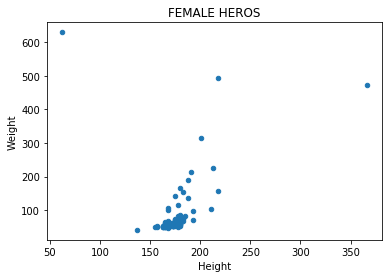

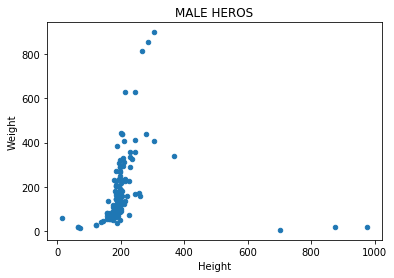

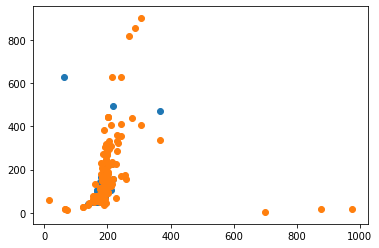

In [118]:
#VISUALIZATION TIME BABY - SCATTERPLOT OF HEIGHT VS WEIGHT



# heroes_and_powers2.plot('Height', 'Weight', kind='scatter')






female_heroes.plot('Height', 'Weight', kind='scatter', title='FEMALE HEROS' )
male_heroes.plot('Height', 'Weight', kind='scatter', title='MALE HEROS' )


fig, ax = plt.subplots()
plt.scatter(female_heroes.Height, female_heroes.Weight)
plt.scatter(male_heroes.Height, male_heroes.Weight)
ax.set_title='BOTH'
# heroes_and_powers2.plot('Height', 'Weight', kind='scatter')


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [129]:
male_heroes_df = male_heroes
female_heroes_df = female_heroes

import seaborn as sns
# def show_distplot(dataframe, gender, column_name):
#     x = dataframe(dataframe[gender], column_name)
#     sns.distplot(x)



(0, 250)

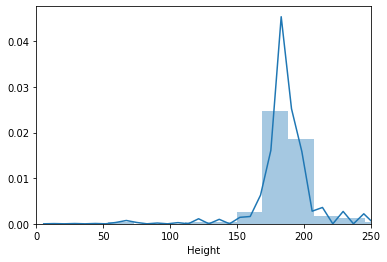

In [148]:
# Male Height
x = male_heroes_df['Height']
sns.distplot(x)
plt.xlim(0,250)

(0, 250)

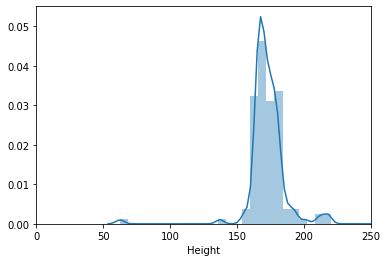

In [149]:
# Female Height
sns.distplot(female_heroes_df['Height'])
plt.xlim(0,250)

(0, 250)

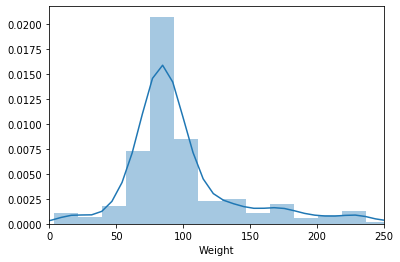

In [153]:
# Male Weight
sns.distplot(male_heroes_df['Weight'])
plt.xlim(0,250)

(0, 250)

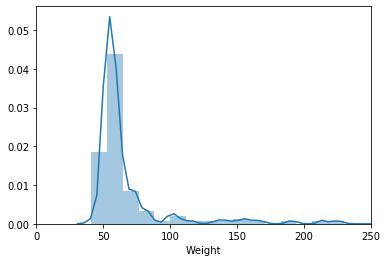

In [154]:
# Female Weight
sns.distplot(female_heroes_df['Weight'])
plt.xlim(0,250)

In [159]:
#Statistics
print('AVG FEMALE HEIGHT: ', female_heroes_df['Height'].mean())
print('AVG MALE HEIGHT: ', male_heroes_df['Height'].mean())
print('AVG FEMALE WEIGHT: ', female_heroes_df['Weight'].mean())
print('AVG MALE WEIGHT: ', male_heroes_df['Weight'].mean())

print('MEDIAN FEMALE HEIGHT: ', female_heroes_df['Height'].median())
print('MEDIAN MALE HEIGHT: ', male_heroes_df['Height'].median())
print('MEDIAN FEMALE WEIGHT: ', female_heroes_df['Weight'].median())
print('MEDIAN MALE WEIGHT: ', male_heroes_df['Weight'].median())

print('MODE FEMALE HEIGHT: ', female_heroes_df['Height'].mode())
print('MODE MALE HEIGHT: ', male_heroes_df['Height'].mode())
print('MODE FEMALE WEIGHT: ', female_heroes_df['Weight'].mode())
print('MODE MALE WEIGHT: ', male_heroes_df['Weight'].mode())



AVG FEMALE HEIGHT:  173.95833333333334
AVG MALE HEIGHT:  193.70857142857142
AVG FEMALE WEIGHT:  79.65151515151516
AVG MALE WEIGHT:  127.31746031746032
MEDIAN FEMALE HEIGHT:  170.0
MEDIAN MALE HEIGHT:  185.0
MEDIAN FEMALE WEIGHT:  57.0
MEDIAN MALE WEIGHT:  90.0
MODE FEMALE HEIGHT:  0    168.0
dtype: float64
MODE MALE HEIGHT:  0    183.0
dtype: float64
MODE FEMALE WEIGHT:  0    54.0
dtype: float64
MODE MALE WEIGHT:  0    79.0
dtype: float64


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________
Females weight less and were shorter on average than men


Men had higher weight outliers

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [ ]:
#5 most common powers?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data